## Requeriments

In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

## Uploading data (input3 indexed)

In [3]:
df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
df

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,319127.933029,C,0.0,NaN,1.284876e+06,NaN,2.380553e+05
1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318417.111563,C,0.0,NaN,1.282014e+06,NaN,2.716166e+05
2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318987.340975,C,0.0,NaN,1.285999e+06,NaN,2.490492e+05
3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,323130.849045,C,0.0,NaN,1.217153e+06,NaN,2.864983e+05
4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,0.0,0.0,690210.427661,C,0.0,NaN,1.278547e+06,NaN,4.267142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255243,201910.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,948228.792420,C,0.0,NaN,NaN,NaN,2.600541e+04
19255244,202002.0,2090044.0,19670629.0,53.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,42015.094340,D,0.0,NaN,NaN,NaN,1.486611e+05
19255245,201903.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,0.0,0.0,963768.746310,B,0.0,NaN,NaN,NaN,8.069678e+05
19255246,202001.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,42297.237145,D,0.0,NaN,NaN,NaN,1.144466e+06


In [3]:
list(df.columns)

['periodo',
 'id_cli',
 'fecha_nacimiento',
 'edad',
 'genero',
 'estado_civil',
 'nivel_academico',
 'profesion',
 'ocupacion',
 'tipo_vivienda',
 'ult_actual',
 'categoria',
 'codigo_ciiu',
 'ind_mora_vigente',
 'cartera_castigada',
 'ciudad_residencia',
 'departamento_residencia',
 'ciudad_laboral',
 'departamento_laboral',
 'rechazo_credito',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cupo_total_tc',
 'tenencia_tc',
 'cuota_tc_bancolombia',
 'tiene_consumo',
 'tiene_crediagil',
 'nro_tot_cuentas',
 'ctas_activas',
 'tiene_ctas_activas',
 'ctas_embargadas',
 'tiene_ctas_embargadas',
 'pension_fopep',
 'cuota_cred_hipot',
 'tiene_cred_hipo_1',
 'tiene_cred_hipo_2',
 'mediana_nom3',
 'mediana_pen3',
 'ingreso_nompen',
 'cat_ingreso',
 'ingreso_final',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_tarjeta_de_credito',
 'cuota_de_sect

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [5]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,19255248,2,M,9731146
estado_civil,17367098,5,SOLTERO,8912674
nivel_academico,13462351,6,UNIVERSITARIO,6907133
profesion,13479312,79,OTROS,5192581
ocupacion,19189090,10,Empleado,12159872
tipo_vivienda,9050814,3,FAMILIAR,4381905
ciudad_residencia,19209195,1521,BOGOTA D.C.,4877742
departamento_residencia,19074043,34,ANTIOQUIA,6239768
ciudad_laboral,14025157,1331,BOGOTA D.C.,4034999
departamento_laboral,13456250,34,ANTIOQUIA,4362626


## Tagging

### Mean(ind)

In [6]:
labels_ind = pd.DataFrame(columns = [#Var_Mean',                             
                                'Categoria',
                                'Particip',
                                'Variable',
                                'Label'])
labels_ind

,Categoria,Particip,Variable,Label


In [7]:
tmp = []
tmp = df.pivot_table('ind','genero', aggfunc={np.mean})
tmp.reset_index(inplace =True)
tmp.columns = ['Categoria','Particip']
tmp.sort_values(by='Particip', ascending=False, inplace=True)
variable = (('genero'+',')*len(df['genero'].unique())).split(',')[:-1]
tmp['Variable'] = variable
label = list(range(1,len(df['genero'].unique())+1))[::-1]
tmp['Label'] = label
labels_ind = labels_ind.append(tmp)
print(labels_ind)

  Categoria      Particip Variable Label
1         M  1.502457e+06   genero     2
0         F  1.053214e+06   genero     1


In [8]:
for var in features_o[1:]:
    tmp = []
    tmp = df.pivot_table('ind',var, aggfunc={np.mean})
    tmp.reset_index(inplace =True)
    tmp.columns = ['Categoria','Particip']
    tmp.sort_values(by='Particip', ascending=False, inplace=True)
    variable = ((var+',')*len(df[var].unique())).split(',')[:-2]
    tmp['Variable'] = variable
    label = list(range(1,len(df[var].unique())+1))[::-1][:-1]
    tmp['Label'] = label
    labels_ind = labels_ind.append(tmp)

labels_ind.head(60)

,Categoria,Particip,Variable,Label
1,M,1.502457e+06,genero,2
0,F,1.053214e+06,genero,1
0,CASADO,1.737485e+06,estado_civil,6
4,VIUDO,1.516885e+06,estado_civil,5
3,UNION LIBRE,1.376242e+06,estado_civil,4
2,SOLTERO,1.080842e+06,estado_civil,3
1,DIVORCIADO,6.015128e+05,estado_civil,2
3,PRIMARIO,3.301255e+06,nivel_academico,7
0,BACHILLER,2.221650e+06,nivel_academico,6
2,NINGUNO,1.663085e+06,nivel_academico,5


### Mean(gasto_familiar)

In [9]:
labels_gasto_familiar = pd.DataFrame(columns = [#Var_Mean',                             
                                'Categoria',
                                'Particip',
                                'Variable',
                                'Label'])
labels_gasto_familiar

,Categoria,Particip,Variable,Label


In [10]:
tmp = []
tmp = df.pivot_table('gasto_familiar','genero', aggfunc={np.mean})
tmp.reset_index(inplace =True)
tmp.columns = ['Categoria','Particip']
tmp.sort_values(by='Particip', ascending=False, inplace=True)
variable = (('genero'+',')*len(df['genero'].unique())).split(',')[:-1]
tmp['Variable'] = variable
label = list(range(1,len(df['genero'].unique())+1))[::-1]
tmp['Label'] = label
labels_gasto_familiar = labels_gasto_familiar.append(tmp)
labels_gasto_familiar

,Categoria,Particip,Variable,Label
1,M,901982.032955,genero,2
0,F,695193.089315,genero,1


In [11]:
for var in features_o[1:]:
    tmp = []
    tmp = df.pivot_table('gasto_familiar',var, aggfunc={np.mean})
    tmp.reset_index(inplace =True)
    tmp.columns = ['Categoria','Particip']
    tmp.sort_values(by='Particip', ascending=False, inplace=True)
    variable = ((var+',')*len(df[var].unique())).split(',')[:-2]
    tmp['Variable'] = variable
    label = list(range(1,len(df[var].unique())+1))[::-1][:-1]
    tmp['Label'] = label
    labels_gasto_familiar = labels_gasto_familiar.append(tmp)

labels_gasto_familiar.head(60)

,Categoria,Particip,Variable,Label
1,M,9.019820e+05,genero,2
0,F,6.951931e+05,genero,1
0,CASADO,9.678370e+05,estado_civil,6
3,UNION LIBRE,8.678049e+05,estado_civil,5
1,DIVORCIADO,7.881397e+05,estado_civil,4
4,VIUDO,6.969590e+05,estado_civil,3
2,SOLTERO,6.912766e+05,estado_civil,2
3,PRIMARIO,1.044915e+06,nivel_academico,7
1,ESPECIALIZACION,9.965050e+05,nivel_academico,6
0,BACHILLER,8.480184e+05,nivel_academico,5


# Mean(Whatever)

In [119]:
labels = pd.DataFrame(columns = ['Categoria',
                                'Particip',
                                'Variable',
                                'Label',
                                'Var_mean',])                             
                                

for i in ['gasto_familiar','ind','ingreso_nompen']:
    for var in features_o[1:]:
        tmp = []
        tmp = df.pivot_table(i,var, aggfunc={np.mean})
        tmp.reset_index(inplace =True)
        tmp.columns = ['Categoria','Particip']
        tmp.sort_values(by='Particip', ascending=False, inplace=True)
        variable = ((var+',')*len(df[var].unique())).split(',')[:-2]
        tmp['Variable'] = variable
        label = list(range(1,len(df[var].unique())+2))[:-2][::-1]
        tmp['Label'] = label
        var_mean = ((i+',')*len(df[var].unique())).split(',')[:-2]
        tmp['Var_mean'] = var_mean
        labels = labels.append(tmp)
        

labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
3,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
1,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
4,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
2,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
3,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
5,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
6,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
7,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [120]:
labels.to_csv("/mnt/workstation/data/labels.csv", index=False)

In [10]:
tmp = df.pivot_table('gasto_familiar','ciudad_residencia', aggfunc={np.max, np.min, np.std,  np.mean, 'size' })
tmp.columns = ['Máximo', 'Mínimo','Promedio','#Registros','Desviación Estandar']
tmp.sort_values(by='Promedio', ascending=False, inplace=True)
tmp.reset_index(inplace=True)
ciudades = ['BOGOTA D.C.',
            'MEDELLIN',
            'CAMPOHERMOSO',
            'CHIQUINQUIRA',
            'BARRANQUILLA',
            'CALI',
           'CARTAGENA']
tmp =tmp[tmp['ciudad_residencia'].isin(ciudades) ==True]
tmp

,ciudad_residencia,Máximo,Mínimo,Promedio,#Registros,Desviación Estandar
381,BARRANQUILLA,7.217536e+08,0.000000e+00,891550.047876,777410,1.978005e+06
470,CHIQUINQUIRA,3.036619e+07,0.000000e+00,838498.428685,5674,1.533464e+06
491,CARTAGENA,5.110716e+08,0.000000e+00,828681.705299,491389,1.650669e+06
513,CALI,2.106288e+08,0.000000e+00,815125.146073,1264011,1.490228e+06
560,MEDELLIN,9.157655e+08,0.000000e+00,794696.884005,3860375,1.638390e+06
603,BOGOTA D.C.,5.776851e+08,-1.309961e+06,775351.856868,4877742,1.595038e+06
1353,CAMPOHERMOSO,9.417113e+05,5.189923e+04,347801.438604,13,2.533989e+05


Text(0.5, 1.0, 'Gasto Familiar por persona ciudad')

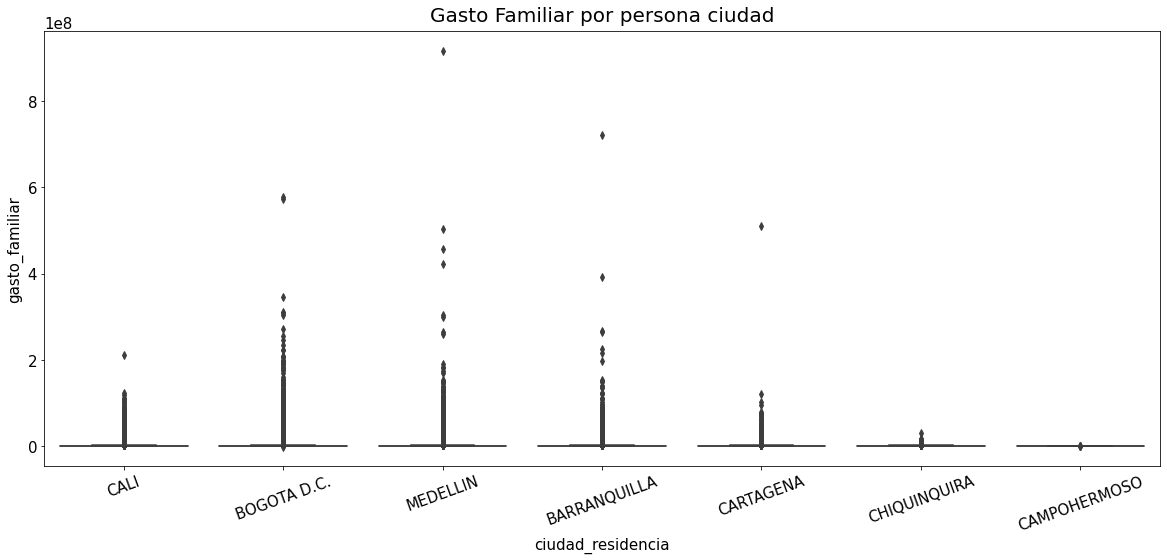

In [11]:
df = df[df['ciudad_residencia'].isin(ciudades)==True]

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,8))
sns.boxplot(x='ciudad_residencia', y='gasto_familiar', data=df)
plt.xticks(rotation=20)
plt.title("Gasto Familiar por persona ciudad", fontsize=20, verticalalignment='bottom')